In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [3]:
file_path = "/content/drive/MyDrive/dataset/Data_s_E5 (1)"
with open(file_path, "rb") as file:
  data = pickle.load(file)
data.head()

,reviewerID,asin,reviewText,overall,feature,original_reviewText
0,A2EKIE8ATFNAWU,0005019281,i saw this for the first time in the s and lik...,5.0,"[[[106, 108, 109], [137, 139, 140], [152, 154,...",I saw this for the first time in the 80s and l...
1,A1I8PLHXCCP1AG,0005119367,this is a fantast movi or the retel of the sto...,5.0,"[[[0, 19, 45], [8, 38, 63], [23, 59, 82], [40,...",This is a fantastic movie or the retelling of ...
2,A2TWPL984OQ5DN,0307514161,what s all this complain about destini s child...,1.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...",What's all this complaining about Destiny's Ch...
3,A3RHFIMN42TM03,0307514161,ive watch this everi year sinc i was young it ...,5.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...","Ive watched this every year since I was young,..."
4,A3A48XEYWLWH7T,0307514161,my wife return from some christma shop w the r...,5.0,"[[[23, 36, 43], [42, 69, 76], [53, 102, 109], ...",My wife returned from some Christmas shopping ...


In [4]:
random_subset = data.sample(n=500, random_state=42)

# Display the first few rows of the random subset
random_subset.head()
random_subset.shape

(500, 6)

In [5]:
feature_data = random_subset['feature']
review_data = random_subset['reviewText']
rating_data = random_subset['overall']


In [6]:
# building lstm model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
Xt = random_subset['reviewText']
yt = random_subset['overall']

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(Xt)
X_sequences = tokenizer.texts_to_sequences(Xt)

# Pad sequences to a fixed length (adjust maxlen as needed)
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_padded, yt, test_size=0.2, random_state=42)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_1, y_train_1, epochs=100, batch_size=32, validation_split=0.2)

loss = model_lstm.evaluate(X_test_1, y_test_1)
print(f"Test loss: {loss}")

new_text = ["Example review text"]  # Replace with your text data
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=maxlen)

predicted_rating = model_lstm.predict(new_text_padded)
print(f"Predicted rating: {predicted_rating[0][0]}")


Epoch 1/100
10/10 [==============================] - 10s 259ms/step - loss: 16.8770 - val_loss: 15.6165
Epoch 2/100
10/10 [==============================] - 2s 165ms/step - loss: 8.1336 - val_loss: 1.1693
Epoch 3/100
10/10 [==============================] - 1s 124ms/step - loss: 1.6803 - val_loss: 1.1669
Epoch 4/100
10/10 [==============================] - 1s 98ms/step - loss: 1.2546 - val_loss: 1.3000
Epoch 5/100
10/10 [==============================] - 1s 77ms/step - loss: 1.2774 - val_loss: 1.1489
Epoch 6/100
10/10 [==============================] - 1s 64ms/step - loss: 1.2029 - val_loss: 1.1353
Epoch 7/100
10/10 [==============================] - 1s 86ms/step - loss: 1.1692 - val_loss: 1.1364
Epoch 8/100
10/10 [==============================] - 1s 75ms/step - loss: 1.1298 - val_loss: 1.1443
Epoch 9/100
10/10 [==============================] - 0s 54ms/step - loss: 1.0507 - val_loss: 1.1194
Epoch 10/100
10/10 [==============================] - 1s 96ms/step - loss: 0.9619 - val_loss: 

In [21]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 689473 (2.63 MB)
Trainable params: 689473 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# building the cnn model
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

Xf = random_subset['feature']
yf = random_subset['overall']

Xf = [np.concatenate(x) for x in Xf]

# Convert features and target to numpy arrays
Xf = np.array(Xf)
yf = np.array(yf)

Xf = Xf.reshape(Xf.shape[0], 224, 224, 3)



X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(Xf, yf, test_size=0.2, random_state=42)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

model_cnn.compile(loss='mean_squared_error', optimizer='adam')
model_cnn.fit(X_train_2, y_train_2, epochs=100, batch_size=32, validation_split=0.2)
model_cnn.summary()

loss = model_cnn.evaluate(X_test_2, y_test_2)
print(f"Test loss: {loss}")

predicted_ratings = model_cnn.predict(X_test_2)
print(f"Predicted rating: {predicted_rating[0][0]}")

Epoch 1/100
10/10 [==============================] - 2s 126ms/step - loss: 1669851.7500 - val_loss: 2211.0703
Epoch 2/100
10/10 [==============================] - 1s 52ms/step - loss: 531.1970 - val_loss: 15.0325
Epoch 3/100
10/10 [==============================] - 1s 52ms/step - loss: 10.7228 - val_loss: 5.5221
Epoch 4/100
10/10 [==============================] - 1s 55ms/step - loss: 3.7783 - val_loss: 3.4967
Epoch 5/100
10/10 [==============================] - 1s 52ms/step - loss: 2.9295 - val_loss: 3.0927
Epoch 6/100
10/10 [==============================] - 1s 54ms/step - loss: 1.8050 - val_loss: 2.5320
Epoch 7/100
10/10 [==============================] - 1s 51ms/step - loss: 1.4534 - val_loss: 2.6029
Epoch 8/100
10/10 [==============================] - 1s 52ms/step - loss: 1.2410 - val_loss: 2.5753
Epoch 9/100
10/10 [==============================] - 1s 52ms/step - loss: 0.9295 - val_loss: 2.7638
Epoch 10/100
10/10 [==============================] - 1s 54ms/step - loss: 0.7793 - va

4/4 [==============================] - 0s 14ms/step
Ensemble model test MSE: 1.4902287396124008
Epoch 1/100
2/2 [==============================] - 1s 144ms/step - loss: 18.4219 - val_loss: 17.2280
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 18.2706 - val_loss: 17.0805
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 18.1172 - val_loss: 16.9341
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 17.9557 - val_loss: 16.7892
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 17.8049 - val_loss: 16.6448
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 17.6560 - val_loss: 16.5007
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 17.5026 - val_loss: 16.3577
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 17.3558 - val_loss: 16.2151
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 17.2086 - val_loss: 16.0732
Epo

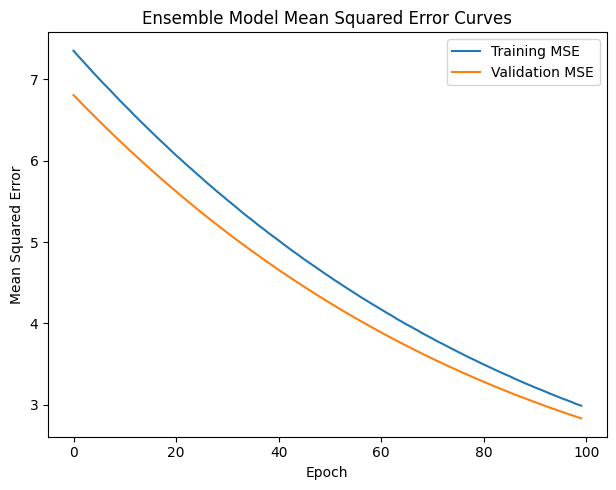

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


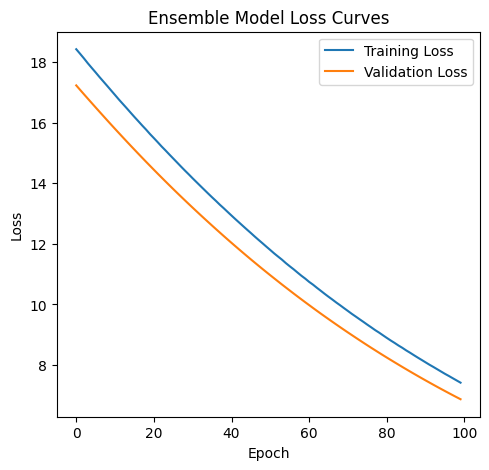

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you've trained the LSTM (model_lstm) and CNN (model_cnn) models
lstm_predictions = model_lstm.predict(X_test_1)
cnn_predictions = model_cnn.predict(X_test_2)

# Combine the predictions with weighted average
weight_lstm = 0.6
weight_cnn = 0.4

combined_predictions = (weight_lstm * lstm_predictions) + (weight_cnn * cnn_predictions)

# Assuming y_test is your true ratings for the test data
mse = mean_squared_error(y_test_1, combined_predictions)
print(f"Ensemble model test MSE: {mse}")

# Define an ensemble model
input_layer = Input(shape=(2,))  # The input shape should match the number of models combined
ensemble_output = Dense(1, activation='linear')(input_layer)

ensemble_model = Model(inputs=input_layer, outputs=ensemble_output)
ensemble_model.compile(loss='mean_squared_error', optimizer='adam')

# Combine the data from both models
combined_data = np.hstack((lstm_predictions, cnn_predictions))
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_data, y_test_1, test_size=0.2, random_state=42)
ensemble_history = ensemble_model.fit(X_train_combined, y_train_combined, epochs=100, batch_size=32, validation_split=0.2)
train_mse_history = []
val_mse_history = []

# Training loop
for epoch in range(100):
    history = ensemble_model.fit(X_train_combined, y_train_combined, epochs=1, batch_size=32, validation_split=0.2, verbose=0)
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    train_mse_history.append(train_loss)
    val_mse_history.append(val_loss)

    print(f"Epoch {epoch + 1}/{100} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_mse_history, label='Training MSE')
plt.plot(val_mse_history, label='Validation MSE')
plt.title('Ensemble Model Mean Squared Error Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()



ensemble_loss = ensemble_history.history['loss']
ensemble_val_loss = ensemble_history.history['val_loss']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ensemble_loss, label='Training Loss')
plt.plot(ensemble_val_loss, label='Validation Loss')
plt.title('Ensemble Model Loss Curves')
plt.xlabel('Epoch')
plt.ylabel ('Loss')
plt.legend()

ensemble_model.summary()


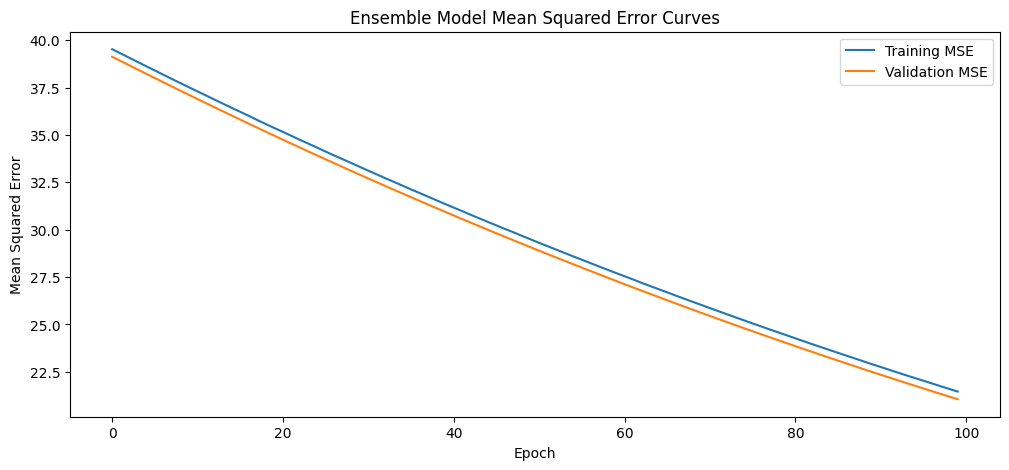

In [13]:
import matplotlib.pyplot as plt

# Assuming you have train_mse_history and val_mse_history lists from the previous code

# Plot the MSE curves
plt.figure(figsize=(12, 5))
plt.plot(train_mse_history, label='Training MSE')
plt.plot(val_mse_history, label='Validation MSE')
plt.title('Ensemble Model Mean Squared Error Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
